## DL Foundations

What is deep learning, and how does it differ from traditional machine learning?
- Deep learning is a subset of machine learning that uses neural networks with many layers to learn hierarchical feature representations from raw data.
- Unlike ML which relies on manual feature engineering deep learning automatically extracts features through layers, making it more suited for complex tasks like image recognition or natural language processing
- DL requires huge amounts of data to train the models.
- Due to heavy matrix operations involved GPUs are needed.
- DL models are much less interpretable compared to ML models.
- DL models can use transfer learning and each solution does not have to start from scratch.

What is a Neural Network?
- A neural network is a collection of interconnected computational units called neurons, organized into layers—input, hidden, and output. Each neuron takes inputs, which can come from raw data or the outputs of previous neurons. These inputs are multiplied by weights, summed together, and combined with a bias term. The result is passed through an activation function, which introduces non-linearity to help the network model complex patterns. This structure allows the network to learn hierarchical representations, transforming inputs into meaningful predictions, like classifying images or translating text.

What are the components of a basic NN?
- Neurons: Units that process inputs, compute a weighted sum, add a bias, and apply an activation function.
- Layers: Groups of neurons forming input, hidden, and output layers. Input layers receive data, hidden layers learn features, and output layers produce predictions.
- Weights: Parameters that scale inputs, determining their influence on a neuron’s output.
- Biases: Constants added to the weighted sum, allowing the model to better fit data
- Activation Functions: Functions (e.g., ReLU, sigmoid) that introduce non-linearity, enabling complex pattern learning

What is the role of activation functions in neural networks? 
- Activation functions transform a neuron’s weighted input into a non-linear output, enabling neural networks to learn complex, non-linear patterns in data. Without them, the network would behave like a linear model, limited to simple, linear relationships, and unable to handle tasks like image or speech recognition. Common activation functions include ReLU and sigmoid.

What is the universal approximation theorem, and what does it imply about neural networks?
- The universal approximation theorem states that a feedforward neural network with one hidden layer, sufficient neurons, and a non-linear activation function, like sigmoid, can approximate any continuous function to arbitrary accuracy. It implies neural networks are highly versatile, capable of modeling complex data relationships for tasks like regression or classification, though deeper networks are often preferred in practice for better efficiency and feature learning.

Need of Bias
- Bias allows a neural network to learn meaningful patterns even when inputs are zero.
It shifts the activation threshold, giving neurons the ability to activate independently of the input.
This increases the expressiveness and flexibility of the network, enabling it to model more complex functions.

## Forward Propagation and Loss Functions

What is FP?
- FP is the process of passing data through each layer of a NN to produce an output. Each neuron will find the weighted sum, add a bias and apply an activation fuction. Finally the output is compared with the true values inorder to caluclate the loss and start the back propagation.

What is loss function?
- Loss function is the difference between NN's predicted output and the true output.
- For Regression: MSE,MAE,RMSE,Huber Loss,Log-Cosh Loss.
- For Classification: Binary Cross Entropy, Categorical Cross Entropy, Sparse Categorical Cross Entropy.

- MSE penalizes large errors, as we are finding the square of the error, works well with GD, as it is diffrentiable.
- MAE penalizes all errors equally, more robust to outliers compared to MSE, it is not diffrentiable.
- Unit is same as the orginal data, so better for interpreting than MSE.
- Huber loss combines both mse and mae

- **Binary Cross Entropy Loss**=−[ylog(y^)+(1−y)log(1− y^)]
- Used in binary classification.
- **Categorical Cross Entropy** = -summ of [yi*log(yi^)]
- Used for multiclass classification.
- Used when labels are one hot encoded eg: [1,0,0],[0,1,0],[0,0,1]
- **Sparse categorical cross entropy** = same as CCE, but used when labels are integers like 1,2,3,..
- Used when there are of classes.

What is the purpose of the softmax function in classification tasks?
- The softmax function converts a neural network’s raw output scores, or logits, into probabilities for each class in a multi-class classification task.
- The summation of all probabilites will come to 1, making interpretation easier.
- (e^logit of a class)/(summation of all e^logits)


Cost Function vs Loss Function
- Loss Function calculates the difference in the prediction for just a single row, and cost function will find the total losses for the whole dataset.

What are Logits?
- Logits are the raw, unnormalized scores produced by the **output layer** of a neural network before applying an activation function like softmax

## Backpropagation and Optimization

What is BP and how does it work?
- BP is the algorithm used for training NN's,it involves calculating the gradient of the loss function with respect to each trainable parameter using chain rule and thus updating the parameters to optimize the NN.

BP Working Steps
- Forward Prop: Find the network's output and loss.
- Compute Loss gradient: Loss's derivative with respect to output.
- Backward Prop: Use chain rule to find the gradient for each weights and biases.
- Update parameters.
- Continue FP.

What is Gradient Descent and explain it's working?
- Gradient descent is an optimization algorithm that minimizes the loss function by iteratively adjusting parameters in the direction of the steepest descent, guided by the loss’s gradient.
- Wnew = Wold - n * (der(L)//Wold)
- Learning rate determines the scale of change we bring to parameters.
- Too small LR with take a long time to reach optima and high LR may overlook optima values.

Types of GR
- Batch GR:Computes the loss using the entire dataset, and updates the parameters once per iteration, it's very slow but gauranteed to give result.
- Stochastic GD: Computes the loss based on a single datapoint,makes it much faster but the variance of the loss per each update will be high and ther is a chance of overlooking the local minima.
- Mini Batch GD: Computes the loss using a batch of data ensuring speed and stability in training.

To stop BP
- Backpropagation stops when the training process stops, based on criteria like max epochs, convergence, early stopping, or manual interruption.

Vanishing Gradient Problem
- This occurs during training when the gradient gets too small and hence parameter will not happen correctly.
- The reason are:
- Activation Functions: (Sigmoid,Tanh) these squish the output values between 0 and 1.
- Chain rule essentially involves multiplication and when we multiply several partial derivatives which are smaller values, the whole gradient may become too small.
- Small weight initialization: if weights in the initial steps are too small, then the gradients may be too small.

How to handle VGP:
- Reducing model complexity.
- Better activation function like ReLU.
- Better weight initialization techniques like Xavier.
- Batch Normalization.
- Using skip connections.

Optimizers
- They are algorithms used to find the best value of parameters that minimizes the cost function.
- GD is the one we know.
- But there are issues with GD, for instance when we are dealing with big data, there might be multiple local minimas,saddle points and flat regions, in these type of data GD may bet trapped in these regions.
- So instead we can use SGD with momentum,Adaptive Gradient(AdaGrad),Root Mean Square Propagation(RMS Prop), Adaptive Moment Estimation(Adam)

SGD With Momentum
- Like SGD, It works based on the loss of one datapoint.
- But in updating the parameters, it is based on the current gradient and the running average of past gradients scaled by a momentum factor.
- If the momentum factor is 0, then algo becomes SGD.
- So the intution is, if the past data point indicate same direction of updation the the scale of change of parameter will be high.
- Hence it reaches near global minima faster, but due to momentum it takes to settle down in it.
- It has a better chance of escaping local minimas than vanilla GD.

#### Important
The problem with gradient descent (GD) and its variants, like stochastic GD, is that neural networks have many parameters, and a single global learning rate can be problematic. A fixed rate may be too large for some parameters, causing overshooting or instability, or too small for others, slowing convergence, especially in tasks with sparse or uneven data. Adagrad and RMSprop address this by assigning an adaptive learning rate to each parameter, tailored to its behavior.

They achieve this by using the history of a parameter’s gradients. Adagrad scales the global learning rate by dividing it by the square root of the sum of all past squared gradients for that parameter. RMSprop improves on this by using an exponentially decaying average of past squared gradients, emphasizing recent ones to avoid overly shrinking rates. If a parameter’s gradients are large or “steep” (indicating frequent or significant updates), the effective learning rate is reduced, slowing updates to prevent divergence. If gradients are small or “flat” (indicating rare or minor updates), the effective learning rate is higher, speeding up learning for those parameters.

This adaptive approach ensures each parameter moves at an appropriate pace, making training more efficient and robust, particularly for complex neu

Adaptive Gradient(AdaGrad)
- AdaGrad is an optimization algo that alters the learning rate based on the history of gradients.
- Adagrad divides the global learning rate by the square root of the sum of all past squared gradients
- For each parameter, it accumulates the sum of squared gradients at each time step. 
- But the problem is learning rate gets smaller overtime and leads to halt in training.
- It works well with sparse data.
- The idea is that parameters that change a lot(steep gradients) get smaller learning rate.
- Smaller steps so that we don't overlook the local minima.
- and parameters that change less often get larger learning rate.

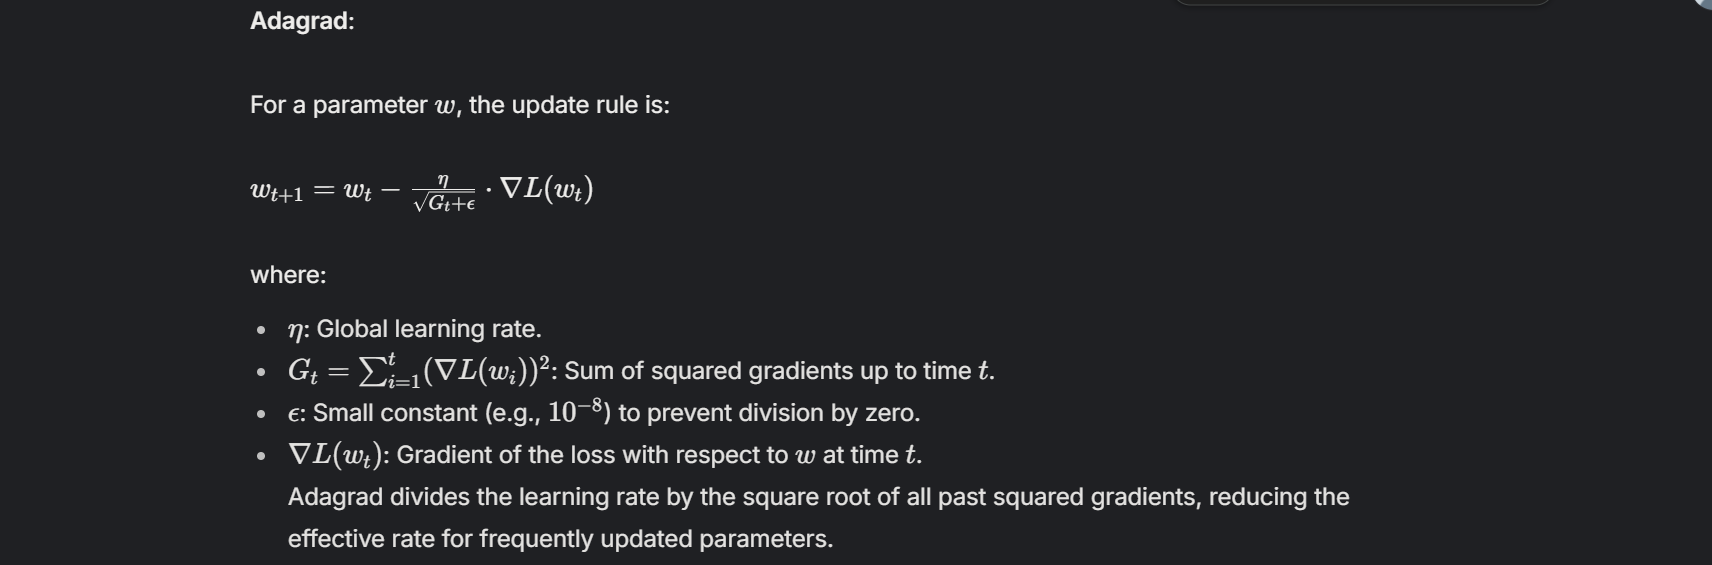

Root Mean Square Propagation(RMS Prop)
- Optimization algo similar to Adagrad
- But instead of summign the past gradients forever, it uses exponentially decaying averages of past squared gradients.
- This is used to address the shrinking learning rate in AdaGrad.
- By focusing on recent gradients it maintain effective learning rate, making it suitable for non convex functions.
- In neural networks, RMSprop is a popular optimizer because it converges faster than basic SGD and handles complex loss landscapes well.
- its advantages include faster training than Adagrad, robustness to noisy gradients, and minimal tuning of the decay rate,
- But compared to Adam it lacks momentum

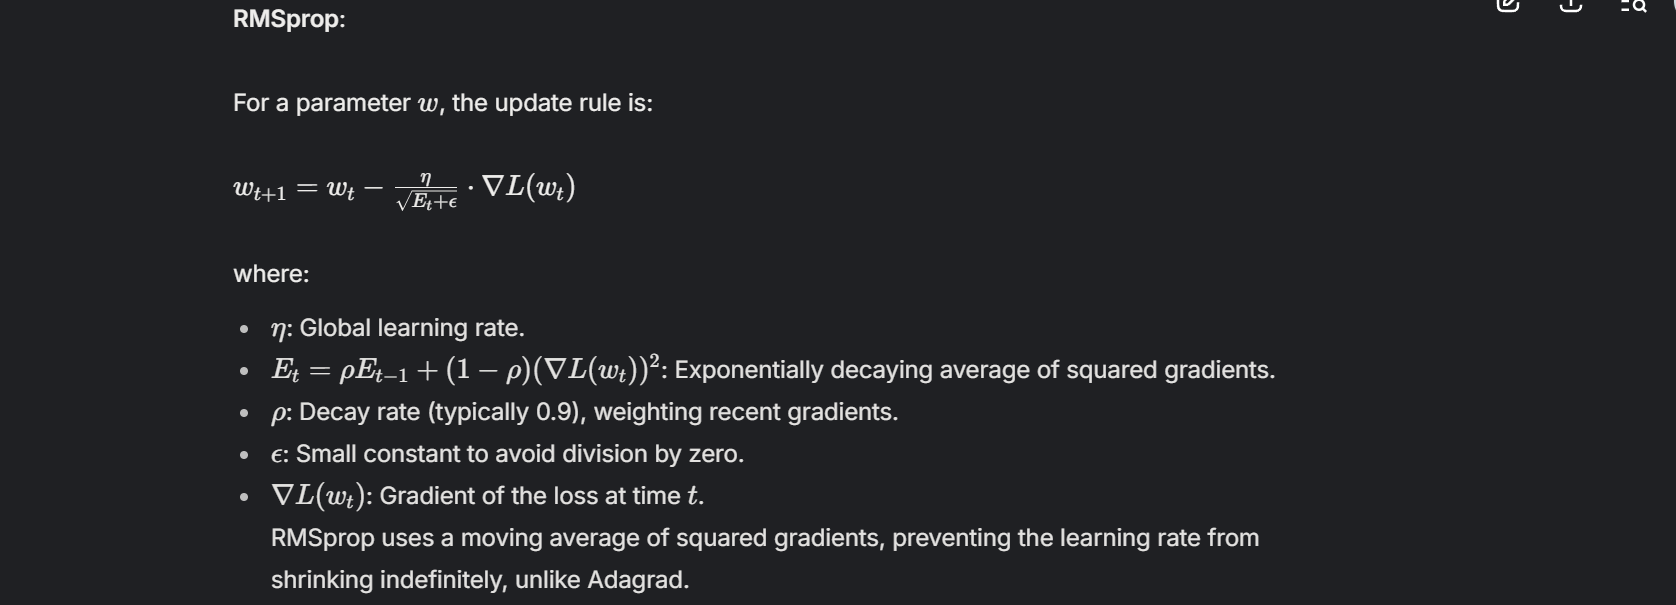

Adaptive Moment Estimation
- An optimization algo that combines both Momentum and Adaptive learning rate.
- So like momentum, it keeps track of the averagae direction to go in.
- and like RMSprop, it alters the learning rate based on how big or small gradients are.
- so for momentum we calculate the **first moment estimate** mt, just like in SGDwM, we add the sclaed past graidens to the current gradient time step.
- for learning rate,we calculate the **second moment estimate**,vt , here we add the scaled square of past gradients.
- then we remove the bias in both mt and vt
- then we use to calculate the new parameter.

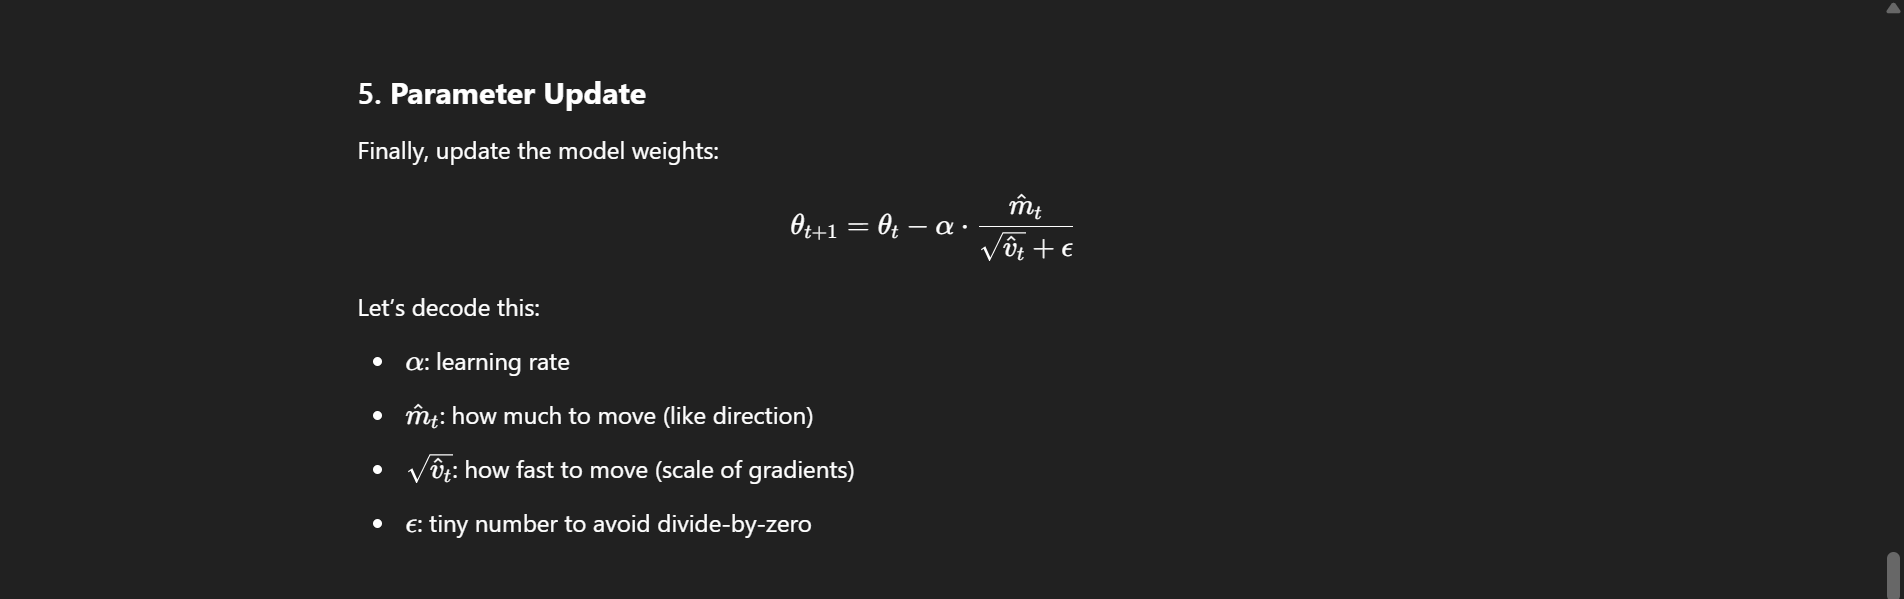

### Activation Functions

Sigmoid Function
- A Function that is defined as f(x)=1/(1+e^-x), it squishes the input between 0 and 1 and creates a s shape curve.
- It can be interpretable as probabilites, so we can use them in binary classifications.<br>
<br>
- drawbacks are: it creates, vanishing gradient problem as sigmoids derivatives reach small values.
- Outputs are non centered creating zig zagging gradient updates.
- Finding exponentials are expensive.

Tanh Function
- It squishes output between -1 and 1.
- It is zero centered.<br>
<br>
- But this too creates vanishing gradient problem
- Exponentials are expensive.

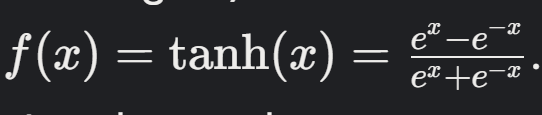

Rectified Linear Unit(Relu) Function
- Negative values are squished to 0 and positive values stay as it is, f(x) = max(0,x)
- Computationally inexpensive.
- prevents the vanishing gradient issue.
- computationally efficient.
- promotes sparsity<br>
<br>
- Not zero centered.
- Dying Relu issue: If the output of a neuron is 0, then the gradients of parameters associated with that neuron will become 0, which essentially halts trainig as there will be no weight updation in training.
- And if there is too much dead neurons, NN will be inefficient.

Leaky Relu
- f(x)=max(ax,x),ax if x<0 where a is 0.01
- so positive values stay as it is, and negataive values will become 1/100th of itself.
- prevents the dying relu issue.
- fast and cheap computation

- Non zero centered.
- if the a is a hyperparameter user can give not it is a **parametric relu**

Exponential Linear Unit
- Positive values stay the same, negative become a(e^x-1), where a is an hyperparameter.
- differentiable.
- no dying relu problem, fast convergence, better generalization.

How does the choice of activation function impact the training speed of a neural network?
- Vanishing gradient issue in Softmax,tanh
- Convergence speed is higher in Relu and its variants.
- Computational Complexity:Simple Relu is cheap, where ever ther are compuation involved things become expensive.
- Sparsity: Relu increase sparsity and thus increasing the speed of operations.

### Feed Forward Neural Network
- It is a simple NN where data flows in only one direction.
- It is usually used for simple classification and regression tasks.
- Structure: Input,Hidden(atleast 1) and output layer.
- Made of neurons, which are computational blocks which find the weighted sum of inputs and then apply some non linear function on top.
- The training process involves FP,Loss calculation and BP using some kind of optimizer.

### RNN

What is a Recurrent Neural Network (RNN)?
- A Recurrent Neural Network (RNN) is a type of neural network designed for processing sequential data
- such as time series or natural language
- by maintaining a hidden state that captures information from previous time steps
- RNNs have a looped architecture that allows them to pass information from one step of the sequence to the next

Working
- RNN processes inputs sequentially, one at a time
- At each step, it takes the current input and the hidden state from the previous step, combines them with weights, applies an activation function (like tanh), and produces an output and a new hidden state
- This hidden state carries information forward, letting the network learn patterns over time
- For training, RNNs use backpropagation through time (BPTT).
- The network computes the loss by comparing predictions to actual targets across all time steps
- Gradients of the loss are calculated with respect to the weights, propagating errors backward through the sequence
- These gradients update the weights via an optimizer (like Adam) to minimize the loss.
- However, RNNs can struggle with long sequences due to issues like vanishing gradients, which is why variants like LSTMs or GRUs are often used.

How does RNN handle varying input lengths
- Varying lengths are handled automatically as each token in each row is handled per timestep.
- so for smaller inputs, RNNs can have less timesteps and for larger inputs, RNNs can have bigger timesteps.
- And they can have same weights through out all the rows of input.

Limitations of RNN
- Vanishing Gradients due to BPTT
- Exploding Gradients
- Short term memory: while dealing with longer sequences RNN struggles to retain information from the earlier timesteps.
- Training Complexity:BPTT is computationally expensive.

Types of RNN
- One to One, Single i/p Single o/p 
- One to Many, One i/p sequence o/p, eg: image captioning.
- Many to one, sequence i/p single o/p, eg: sentiment analysis,spam detection
- Many to Many, 
 - Synchronous: With same lengths, pos tagging, named entity recognition
 - Asynchronous: With differing lengths, Machine Translation

### Long Short Term Memory


What is LSTM
- LSTM (Long Short-Term Memory) is a type of Recurrent Neural Network (RNN) designed to capture long-range dependencies in sequential data.
- LSTM solves the long term memory issue in RNN by having 2 seperate memories for short term and long term.
- LSTM Fundamentally is made up of 3 gates, Forget Gate, Input Gate and Output Gate
- Forget Gate: Will take previous cell state(LTM), previous hidden state(STM),and current input and calculates how information should be preserved in the cell state.
- Input Gate: Will take the modified cell state from forget gate and using current input and previous hidden state, it will calculate the new hidden state, in this gate we are calculating how much new info should be added to the cell state.
- Output Gate: It decides the output of the lstm based on the new cell state and previous hidden state and curren input.

Advantages
- Handles long-term dependencies
- Solves vanishing gradient problem
- Effective for sequential data
- Supports variable-length input/output
- Captures context

Disadvantages
- Complex Architecuture
- Computationally expensive
- Difficult to parallelize
- May overfit on small data

Applications
- Language modeling (e.g., next word prediction)
- Machine translation (e.g., English to French)
- speech recognition (e.g., audio-to-text)
- Time-series forecasting (e.g., stock prices, weather)

Training
- BPTT in LSTM unrolls the network over time steps.
- Gradients are computed through time for each gate and cell/hidden state.
- Optimizers update weights based on accumulated gradients across time steps.

### GRU


What is Gated Recurrent Unit?
- GRU (Gated Recurrent Unit) is a type of Recurrent Neural Network (RNN) designed to model sequential data, effectively capturing long-term dependencies with simpler architecture than LSTM.
- Like LSTM, GRU addresses the vanishing gradient problem of basic RNNs, maintaining both short-term and long-term memory but with fewer parameters for faster training.
- GRU uses two gates—Update Gate and Reset Gate—to control information flow, merging the hidden state and cell state into a single hidden state for efficiency.
- Reset Gate: Determines how much of the previous hidden state to forget when computing the new candidate hidden state. It controls how much past information influences the current step.
- Update Gate: Decides how much of the previous hidden state (past information) to carry forward and how much new information (from the current input) to incorporate. It balances old and new memory.

Advantages
- Simpler Architecture: Fewer gates, faster
- Solves vanishing gradient problem
- Fewer Parameters, less overfitting

Disadvantages
- less Flexible: Merges hidden and cell states
- So if the sequence if too long, it may have long term memory issues.
- Task-Specific Performance: May underperform LSTM on tasks requiring precise long-term memory retention.

Applications
- Same as LSTM

# Transformers

What is a transformer?
- A Transformer is a neural network architecture designed for sequential data it made up of multiple encoder and decoder modules
- Unlike RNNs, it relies on a mechanism called self-attention to process inputs in parallel while capturing sequential information.
- It consists 2 blocks encoder (to understand input) and a decoder (to generate output)
- Main components are: Positional Encoding,Multi head attention, Feed Forward Networks, Masked Multi Head attention, Normalizaton layers and Activation layers.

Explain self attention and its working
- self attention is one the most important components of a transformer.
- It help to create context aware vector encodings of each token, by focusing on the relationship betwen all the tokens in a sequence.
- First using some embedding method we create inital vector representations for each tokens
- Second, for each vector we create 3 new vectors: Query,Key,Value
- These are computed by multiplying the input vector by three different weight matrices (learned during training).
- Third, Attention Score: For each word, the model calculates how relevant every other word is by taking the dot product of its Query vector with every word’s Key vector.
- Scores are scaled
- Then we apply softmax on the attention scores, which turns them into probabilites,
- This creates an attention weight for each word.
- Finally we multiply the attention weights by value vector.
- And finally each output vector will be a contextual representation of the word, enriched with information from other words.

Mutli-head attenion
- It is a extention of SA, where we have multiple self attention working in parallel 
- And each of that SA will learn different aspects about the relationship between tokens
- Finally each vector from each SA will be concatenated to create better dynamic vector representions.
- We do this inorder to get multiple perspectives.

Positional Encoding
- PE is used in transformers due to the inherent flaw in SA
- It creates good encodings, but it does not take into account the sequence of each words.
- Hence we PE.
- The idea is to create a vector for each token that represents the positon of each token and then add that vector into the encoded vector.
- It is done by using sine and cosine funciton of varying frequencies, the input to the funciton would be the positon of each token.
- Finally this positional vector will be added to the encoded vector.

Layer Normalization
- Normalization is a technique used in NN's to stabilize and acclerate training in deep NNs.
- Usually Batch Normalization is preferred but while we do it in transformers, as we are zero padding the sequences for them to be of the same length,BN will not make sense if there is huge number of zeroes in each features.
- So instead we use LN, instead of normalizing per feature, we do it across each sequences.
- mathematically we substract the mean from each datapoint and divide by std dev of each sequence

Encoder Working
- It is where we process our input data.
- first we tokenize the data
- then we create initial embedddings.
- we positional encodings and add it to the vector.
- then we pass it to multi head mechanism, that create dynamic vector reps.
- then we normalize the outputs.
- then we feed it to FNN, it introduces non linearity.
- again normalize
- there are skip connections present.

Masked Multi Head Attention
- **Masked multi-head attention** is a variation of the standard multi-head attention mechanism used in autoregressive models like GPT, where each token in the sequence can only attend to itself and previous tokens, not future ones. This is done by applying a mask to the attention scores, setting the scores for future tokens to negative infinity, so when the softmax function is applied, those tokens are ignored. This ensures that the model does not "cheat" by looking ahead at future tokens, maintaining the causal structure needed for tasks like language modeling and text generation.

Cross Attention
- CA is a mechanism in decoder.
- Cross attention is used to create understanding between different sequences unlike SA.
- cross attention is used to find the relation b/w what has been already outputted and what is still left to be outputted.
- it's inputs are the output of encoder and the already generated outputs of decoder.
- In CA, that target sequence will be the querry vector and the input sequence will be the key and value vectors.
- 

Deconder Working(Training)
- we tokenize input sequences.
- create embeddings.
- add positional encoding
- Pass to masked multi head attention, creates contextual embeddings.
- Normalization
- Pass to cross multi head attention, output is cross contextual embeddings.
- Normalize
- FFNN, for non linearity
- Apply a softmax, to create probability of each output.

Decoder Working(Prediction)
- Input would be words that are already predicted or start tag/
- vectorized, adds positional encoding.
- masked multi head attention
- Cross attention
- FFNN
- Output thorugh a softmax, the word with highest prob

## RAG

Explain the main parts of a RAG system and how they work.
- Retrieval augemented generation is an advanced NLP technique, that combines both retrieveal of information from external databases, internet and use augment with some LLM to generate clear and userfriendly outputs.
- So instead of just relying on the data, the model have during training, the LLM will be able to lookup for better souces outside.
- Retriever: Using some kind of similarity search, data is retrieved.
- Generator: LLM with take the data along with query and produce an output.
- Reduces hallucinations.
- Up to date answer
- Can make domain specific than generic answers.

Best Retrieval Metods
- Dense passage retireval: Using pretrained models like BERT,Robera we can make good vector encodings of query and external data and use similarity search inorder to retireve accurate information, Hugging Face senetence transfomer, OpenAI text embeddings.
- Hybrid Retrieval(Dense+Sparse): Combines dense retireval(embeddings) along with sparse methods like TF-IDF, sparse method can locate keyword matches and dense methods can capture semantic similarity
- Colbert(Contextualised late interaction over BERT): So this takes each tokens and embedds it using BERT, then during working, it runs a similarity seach for retireval.
- Dense vector search with faiss: create vector embedding of text, store it in a vector index and retrieve it from ther
- Graph Based Retrieval: Using Graph Neural Network we create knowledge graphs and retireval nodes or subnodes as needed.

How is hallucination overcomed
- Hallucination is when a language model generates factually incorrect but plausible-sounding text. RAG reduces hallucination by retrieving relevant external documents at runtime and feeding them into the generator, so the model produces answers that are grounded in real-world information.

Evaluvation Metrics for Retrieval
- Precision@k: The proportion of relevant documents in the top-k retrieved documents.
- Recall@k:The proportion of relevant documents retrieved out of the total number of relevant documents.
- Mean Reciprocal Rank (MRR): Measures the ranks at which the relevant document appears in the retrieved list.

Evaluvation Metrics for Generation
- BLUE: Bilingual Evaluvation Understudy: Measures the precision of n grams compared to human generated answers.
- ROGUE: Recall oriented understudy for Gisting Evaluvation: Focus on the recall of n grams, which checks how much of the refernece text is captured in generated text.
- Perplexity: A measure of how well the model predicts the next word. Lower perplexity means the model is more confident and accurate.

Combined Evaluvation
- End-to-End Relevance (Human Evaluation)
- Response Accuracy (Grounded Truth Evaluation),Whether the model’s generated response matches the correct, retrieved facts.

### Fine Tuninig

What?
- Fine-tuning is the process of adapting a pre-trained model to a specific task by training it further on a task-specific dataset. It helps the model learn domain-relevant patterns, improving performance without starting from scratch. This makes it ideal for customizing large language models for specific use cases like sentiment analysis, legal QA, or customer support.

How?
- Use a model already trained on large-scale data
- Prepare Your Dataset
- Choose a Framework (e.g., Hugging Face Transformers)


Pre-training vs Finetuning
- Pre-training teaches a language model general linguistic and world knowledge using massive unlabeled data. In contrast, fine-tuning adapts the model to a specific task or domain using smaller, labeled datasets. Pre-training is expensive and broad, while fine-tuning is targeted and efficient, allowing models to perform well on real-world tasks like sentiment analysis, question answering, or summarization.

Types of Finetuning
- **Supervised Fine Tuning**: It is called supervised as the dataset has i/p o/p pairs.
- During supervised fine-tuning, the pre-trained LLM is fine-tuned on this labeled dataset using supervised learning techniques
- The model’s weights are adjusted based on the gradients derived from the task-specific loss, which measures the difference between the LLM’s predictions and the ground truth labels.

Parameter-Efficient Fine-Tuning (PEFT)
- PEFT is a family of techniques that allow you to fine-tune large pre-trained models by updating only a small subset of parameters, instead of the entire model.
- Only update a few million parameters instead of billions
- Reduce GPU memory requirements
-**Techniques**:
- Adapters: Insert small modules between frozen layers, and only these layers are trained.These layers are added inside transformer blocks, first it reduces dimensonlity, add a activation function and restores the dimensionality. Its basically adding a new FFNN and training that alone.
- LoRA(Low Rank Adaption): We do not do anything to the weights matrices in the LLM(the ones we got by training using backpropagation),so instead of doing anything to these we add smaller weight matrices to the existing ones and train that alone, so the number of parameters to be trained will be small.
- The main model weights are frozen; only these small matrices are trained.
- Prefix Tuning: All model weights are frozen,but we add a trainable prefix vectors to the inputs, by adding fixed length vectors to key and value vectors in the self attention. So we are saying there is some extra data in the input.
- Prompt Tuning: In Prompt Tuning, we prepend learned embedding vectors (not random words) to the input tokens. These task-specific soft prompts are trained using backpropagation, while the original model remains frozen. They help the model adapt to specific tasks without altering the core model weights, making it an efficient fine-tuning method.

- Unsupervised Fine tuning

- Reinforcement Learning from Human Feedback (RLHF)
- RLHF is used to fine-tune models based on human preferences or feedback, often applied in generative tasks.
- What it is: Instead of supervised labels, the model is fine-tuned using rewards based on human feedback. This method is popular for improving generative models like GPT-3 or ChatGPT.
- Humans rank the responses based on quality or preference.

Multi-Task Fine-Tuning
- In multi-task fine-tuning, the model is trained on multiple tasks simultaneously. The objective is to improve the model’s generalization across different tasks rather than specializing in just one.
- You train the model on several different tasks (e.g., text classification, translation, question answering) with multiple datasets.
- Improves the model’s versatility and generalization across different tasks.

- full fine-tuning, all the layers of the pre-trained model are unfroze and updated during the fine-tuning process. Essentially, every parameter in the model is optimized to adapt it for a specific task.
- Layer-wise Fine-Tuning: Instead of fine-tuning all the layers, layer-wise fine-tuning updates only some of the layers in the model. Typically, you might freeze the lower layers (which capture more general knowledge) and fine-tune the top layers (which are more task-specific).
- Last Layer Fine-Tuning: only the final layers of the model are trained while all previous layers are frozen. This method is commonly used in classification tasks where the model just needs to adjust its final output layer.
- Embeddings/Output Layer Fine-Tuning: Similar to the last layer fine-tuning, but this method involves tuning the embedding layer or the output layer of the model. This is especially useful when you have pre-trained embeddings (like word embeddings or sentence embeddings) and want to adapt them for a task.

- Transfer learning is the broader concept of leveraging knowledge learned from one task or domain to improve learning on a different, related task. It is often used when you don't have enough data for the target task but can take advantage of pre-trained models from related domains.
- If you have a pre-trained model on ImageNet (with millions of images), you can transfer this knowledge to a new, smaller dataset for a task like dog breed classification.
- Transfer learning is about reusing a pre-trained model’s knowledge for a new task. Fine-tuning can be a part of transfer learning.
- Fine-tuning refers to the specific process of adjusting a pre-trained model on a new task or dataset to improve performance. Fine-tuning typically involves taking a model that was pre-trained on a large dataset and updating its weights (often by training on a smaller, task-specific dataset).

### Types of Transfer Learning
- Inductive Transfer Learning:Inductive transfer learning is the most common form and involves adapting a pre-trained model to a new, related task where you have labeled data available for the target task. The pre-trained model is fine-tuned or used as a feature extractor.
- Using a model trained on ImageNet to classify dog breeds by fine-tuning the model on a smaller dataset of dog breed images.
- Transductive Transfer Learning:Transductive transfer learning involves transferring knowledge from a source task to a target task, but in this case, the target task might not have labeled data, and the goal is to predict the labels of unseen data from the same distribution.
- Using a model trained on customer reviews sentiment analysis to classify the sentiment of unlabeled product reviews from a different product domain.
- Unsupervised Transfer Learning:Unsupervised transfer learning involves transferring knowledge from a source domain to a target domain, where the target task has no labeled data. The model typically learns representations from the source task that can then be applied to the target task without requiring labeled data for the target task.
- Using a model trained on large corpora of text data (like BERT or GPT) for unsupervised tasks in a new domain, such as generating text or performing clustering without labeled examples.

### Prompt Engineering
- Prompt engineering refers to the process of crafting input prompts in a way that elicits the desired behavior or output from a language model
- It involves designing the text or input format that is fed into the model to get the most relevant and accurate response for a specific task or domain.
- Prompts are the instructions or input text provided to the model to guide its response

Types of prompt engineering 
- Zero-Shot Learning: This involves giving the AI a task without any prior examples. You describe what you want in detail, assuming the AI has no prior knowledge of the task.
- Prompt: “Explain what a large language model is.” 
- One-Shot Learning: You provide one example along with your prompt. This helps the AI understand the context or format you’re expecting.
- Prompt: “A Foundation Model in AI refers to a model like GPT-3,which is trained on a large dataset and can be adapted to various tasks.Explain what BERT is in this context.”
- Few-Shot Learning: This involves providing a few examples (usually 2–5) to help the AI understand the pattern or style of the response you’re looking for.
- Chain-of-Thought Prompting: Here, you ask the AI to detail its thought process step-by-step. This is particularly useful for complex reasoning tasks
- Prompt: “Describe the process of developing a Foundation Model in AI,from data collection to model training.”
- Iterative Prompting: This is a process where you refine your prompt based on the outputs you get, slowly guiding the AI to the desired answer or style of answer.
- Negative Prompting: In this method, you tell the AI what not to do. For instance, you might specify that you don’t want a certain type of content in the response.
- Prompt: “Explain the concept of Foundation Models in AI without mentioning natural language processing or NLP.”
- Prompt Chaining: Breaking down a complex task into smaller prompts and then chaining the outputs together to form a final response.

## Langchain

What is LC?
- LangChain is an open-source framework that simplifies building applications with large language models by combining them with external data, tools, and memory.It enables developers to create context-aware, dynamic AI solutions, like chatbots or Q&A systems, by integrating APIs, databases, and custom workflows.

Applications
- Conversational Agents
- RAG Systems
- Code Generation & Execution
- Multi-Modal Applications
- Autonomous Agents

Components of Langchain
- LLMs
- Prompts(PromptTemplate,ChatPromptTemplate)
- Create text prompts with dynamic inputs for standard LLMs
- ChatpromptTemplate is used to communicate or exchange prompts with chatbasedLLMs
- SystemMessagePromptTemplate,HumanMessagePromptTemplate,..
- Chains:Chains are a way to combine multiple components to create complex workflows(e.g., prompt → LLM → output),Sequential Chain, Custom Chain
- They are modular,reusable,we can add memory,tools easily
- Agents:Agent = LLM + Tools + Reasoning Framework
- Decision-makers that choose which tool to use.(LLM+Tool)
- Getinput,think which tool to use,calls tool,observe result,does this cyclically until op is satisified.
- Tools:Websearch,Custom APIs,Calculator,weathertools
- Memory:Store and retrieve converstaion history,(ConversationBufferMemory,ConversationSummaryMemory)
- Retriever:Fetch relavant documents from a database(FAISS,Chroma vector databases)
- Vector Store: Store embeddings for semantic search.(FAISS, Pinecone, Chroma, Weaviate)
- Document Loaders & Text Splitters:Purpose: Load, parse, and chunk documents for RAG.(PyPDFloader,NotionLoader)(RecursiveCharacterTextSplitter)

RAG in Lanchain
- RAG is where we connect a LLM with an external database so that it can give better and accurate results
- LC has lot of RAG specific compenents to make it easier
- Document Loader:TextLoader, CSVLoader
- Text Splitter: CharacterTextSplitter, RecursiveCharacterTextSplitter
- Embeddings: OpenAIEmbeddings, HuggingFaceEmbeddings
- Vector Store: FAISS, Chroma, Weaviate
- Retriever: 
- Prompt Template
- LLM

The LangChain Expression Language provides a flexible, dynamic way to manage complex workflows within LangChain. It allows for the creation of customizable templates, supports conditional logic, and integrates seamlessly with LangChain's existing components like LLMs, retrievers, and vector stores.m

Langgraphs
- Framework for building stateful, multi-step LLM workflows as graphs (nodes + edges).
- Built on top of LangChain.
-  LangGraph is a directed graph of nodes (functions).
- Nodes: Steps (can be LLMs, functions, chains)
- Edges: Conditional logic or default transition
- Graph carries a shared state dictionary.
- Complex control flow (loops, branches)

LangGraph, on the other hand, is built to visualize and manage complex flows and interactions between different components and models in a graph-like structure. It's particularly useful for when you need to manage non-linear workflows, multi-step decision-making, or when the flow of information is more dynamic and conditional.

Advantages
- Visualization of Complex Pipelines
- Dynamic and Conditional Flow
- Graph-Based Reasoning
- Interactivity

You might use LangChain to create a simple or moderately complex pipeline for document processing or language model interaction, but when those pipelines grow in complexity, LangGraph helps by giving you a clear visual representation of how everything fits together and interacts. Together, LangChain and LangGraph allow you to build, manage, and scale sophisticated language-based workflows efficiently.

- LangSmith is a debugging, monitoring, and evaluation platform built by the creators of LangChain. Think of it as the observability layer for everything you build with LangChain or LangGraph.
- LangGraph + LangSmith = Production Ready AI Workflows
- LangGraph helps you build:
- Multi-step, stateful, and conditional workflows

- Non-linear chains (like decision trees, loops, or agent-based systems)

- Modular, testable graph-based flows

- Use LangGraph when your app needs:

- Decision-making across multiple steps

- Agent-like behavior (e.g., planning + tool use)

- Error handling, retries, or backtracking logic

- State transitions (like a chatbot with memory or conversation state)

`